Thanks to https://www.kaggle.com/code/agilesifaka/analysis-of-netflix-content-information/notebook, I learned many techniques, and got many ideas about how to explore the data.

In [1]:
name = "Aahnik Daw"
college_email = "aahnik.d22@iiits.in"
personal_email = "aahnikdaw@gmail.com"
roll_no = "S20220010001"
github_username = "aahnik"

In [2]:
# !pip install --upgrade pip 
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas
# !pip install wordcloud
# !pip install plotly==5.14.1



# Non Graphical Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# load the dataset
df = pd.read_csv("netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
# Problem statement: Analyze netflix data to generate insights that can help grow its business
# basic metrics on the df

def null_percent(col:str):
    print(f"Percentage of null values in {col}",df[col].isnull().sum()/len(df) * 100 )

In [6]:
df.columns,len(df.columns)

(Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
        'release_year', 'rating', 'duration', 'listed_in', 'description'],
       dtype='object'),
 12)

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
df.shape

(8807, 12)

In [11]:
df["show_id"].value_counts() # all show id are unique probably

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

In [12]:
df["show_id"].duplicated().sum()


0

In [13]:
df["type"].value_counts() # there are two types : Movie and TV Show

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [14]:
df["type"].nunique()

2

In [15]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [16]:
df["title"].duplicated().sum()

0

In [17]:
df["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [18]:
df["director"].nunique()

4528

In [19]:
df["cast"].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [20]:
df["cast"].nunique()

7692

In [21]:
df["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [22]:
df["date_added"].str.split(", ",expand=True)[1]

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: 1, Length: 8807, dtype: object

In [23]:
from collections import Counter
year_added_freq = Counter(df["date_added"].str.split(", ",expand=True)[1])
year_added_freq,len(year_added_freq)

(Counter({'2021': 1498,
          '2020': 1879,
          '2019': 2016,
          '2018': 1649,
          '2017': 1188,
          '2016': 429,
          '2015': 82,
          '2014': 24,
          '2013': 11,
          '2012': 3,
          '2011': 13,
          '2009': 2,
          '2008': 2,
          nan: 10,
          '2010': 1}),
 15)

In [24]:
year_added_freq.pop(np.nan)
year_added_freq

Counter({'2021': 1498,
         '2020': 1879,
         '2019': 2016,
         '2018': 1649,
         '2017': 1188,
         '2016': 429,
         '2015': 82,
         '2014': 24,
         '2013': 11,
         '2012': 3,
         '2011': 13,
         '2009': 2,
         '2008': 2,
         '2010': 1})

In [25]:
df["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [26]:
df["release_year"].max(),df["release_year"].min() 
# range of release years

(2021, 1925)

In [27]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [28]:
df["duration"].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [29]:
df["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [30]:
df["description"].duplicated().sum()

32

In [31]:
# how many shows are series vs single watch movies 
# deciding based on duration. duration may contain "Seasons" or "min"

df["duration"]

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [32]:
# counting director, cast, and country properly
# as they have comma seperated values

In [33]:
df["director"].str.match(",").fillna(False)

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: director, Length: 8807, dtype: bool

In [34]:
# utility function

def percentage(item):
    return f" ({round(len(item)/len(df)*100)} %) "

In [35]:
percentage(df[df["type"] == "Movie"])
percentage(df[df["type"] == "TV Show"])


' (30 %) '

In [36]:
# shows having more than 1 director

def having_more_than_one(df:pd.DataFrame, col:str)->pd.DataFrame:
    # return rows which have , in specified col
    return df[df[col].str.match(".*,.*").fillna(False)]

In [37]:
hvmt1d = having_more_than_one(df,"director")
print("no of shows having more than 1 director: ",len(hvmt1d), percentage(hvmt1d))

no of shows having more than 1 director:  614  (7 %) 


In [38]:
hvmt1d.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,NaN,"September 15, 2021",2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...


In [39]:
hvmt1c = having_more_than_one(df,"country")
print("no of shows shot in more than 1 country: ",len(hvmt1c), percentage(hvmt1c))

no of shows shot in more than 1 country:  1320  (15 %) 


In [40]:
hvmt1c.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
46,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan","September 16, 2021",2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...


In [41]:
from collections import Counter
# re-usable function for generating counter of any col that has comma seperated values

def gen_freq_counter(df:pd.DataFrame,col:str)->Counter:
    return Counter(", ".join(df[col].dropna()).split(", "))


In [42]:
directors = gen_freq_counter(df,"director")

In [43]:
directors.most_common(30) # top directors in our dataset

[('Rajiv Chilaka', 22),
 ('Jan Suter', 21),
 ('Raúl Campos', 19),
 ('Suhas Kadav', 16),
 ('Marcus Raboy', 16),
 ('Jay Karas', 15),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12),
 ('Jay Chapman', 12),
 ('Steven Spielberg', 11),
 ('Don Michael Paul', 10),
 ('David Dhawan', 9),
 ('Yılmaz Erdoğan', 9),
 ('Anurag Kashyap', 9),
 ('Shannon Hartman', 9),
 ('Quentin Tarantino', 8),
 ('Robert Rodriguez', 8),
 ('Hakan Algül', 8),
 ('Hanung Bramantyo', 8),
 ('Fernando Ayllón', 8),
 ('Troy Miller', 8),
 ('Justin G. Dyck', 8),
 ('Kunle Afolayan', 8),
 ('Ryan Polito', 8),
 ('Lance Bangs', 8),
 ('Johnnie To', 8),
 ('Umesh Mehra', 8),
 ('Toshiya Shinohara', 7),
 ('Prakash Satam', 7)]

In [44]:
# re-usable function for generating basic stats from comma seperated list
def appearance_stats(counter:Counter,name:str)->None:
    print(f"30 Most common {name}",counter.most_common(30))
    print(f"Total no of unique {name}", len(counter.keys()))
    print(f"Average {name} appearance", round(np.array(list(counter.values())).mean(),2))
    print(f"Median {name} appearance", round(np.median(np.array(list(counter.values()))),2))
    print(f"Number of {name} appeared in more than 1 Netflix content:", sum(np.array(list(counter.values())) > 1))

    

In [45]:
appearance_stats(directors,"directors")

30 Most common directors [('Rajiv Chilaka', 22), ('Jan Suter', 21), ('Raúl Campos', 19), ('Suhas Kadav', 16), ('Marcus Raboy', 16), ('Jay Karas', 15), ('Cathy Garcia-Molina', 13), ('Youssef Chahine', 12), ('Martin Scorsese', 12), ('Jay Chapman', 12), ('Steven Spielberg', 11), ('Don Michael Paul', 10), ('David Dhawan', 9), ('Yılmaz Erdoğan', 9), ('Anurag Kashyap', 9), ('Shannon Hartman', 9), ('Quentin Tarantino', 8), ('Robert Rodriguez', 8), ('Hakan Algül', 8), ('Hanung Bramantyo', 8), ('Fernando Ayllón', 8), ('Troy Miller', 8), ('Justin G. Dyck', 8), ('Kunle Afolayan', 8), ('Ryan Polito', 8), ('Lance Bangs', 8), ('Johnnie To', 8), ('Umesh Mehra', 8), ('Toshiya Shinohara', 7), ('Prakash Satam', 7)]
Total no of unique directors 4993
Average directors appearance 1.4
Median directors appearance 1.0
Number of directors appeared in more than 1 Netflix content: 1023


In [46]:
countries = gen_freq_counter(df,"country")
appearance_stats(countries,"countries")

30 Most common countries [('United States', 3689), ('India', 1046), ('United Kingdom', 804), ('Canada', 445), ('France', 393), ('Japan', 318), ('Spain', 232), ('South Korea', 231), ('Germany', 226), ('Mexico', 169), ('China', 162), ('Australia', 160), ('Egypt', 117), ('Turkey', 113), ('Hong Kong', 105), ('Nigeria', 103), ('Italy', 100), ('Brazil', 97), ('Argentina', 91), ('Belgium', 90), ('Indonesia', 90), ('Taiwan', 89), ('Philippines', 83), ('Thailand', 70), ('South Africa', 62), ('Colombia', 52), ('Netherlands', 50), ('Denmark', 48), ('Ireland', 46), ('Sweden', 42)]
Total no of unique countries 127
Average countries appearance 78.85
Median countries appearance 5.0
Number of countries appeared in more than 1 Netflix content: 86


In [47]:
actors = gen_freq_counter(df,"cast")
appearance_stats(actors,"actors")

30 Most common actors [('Anupam Kher', 43), ('Shah Rukh Khan', 35), ('Julie Tejwani', 33), ('Naseeruddin Shah', 32), ('Takahiro Sakurai', 32), ('Rupa Bhimani', 31), ('Akshay Kumar', 30), ('Om Puri', 30), ('Yuki Kaji', 29), ('Amitabh Bachchan', 28), ('Paresh Rawal', 28), ('Boman Irani', 27), ('Rajesh Kava', 26), ('Vincent Tong', 26), ('Andrea Libman', 25), ('Kareena Kapoor', 25), ('Samuel L. Jackson', 24), ('John Cleese', 24), ('Jigna Bhardwaj', 23), ('Fred Tatasciore', 23), ('Tara Strong', 23), ('Daisuke Ono', 22), ('Junichi Suwabe', 21), ('Ajay Devgn', 21), ('Ashleigh Ball', 21), ('Kay Kay Menon', 21), ('Nicolas Cage', 21), ('Nawazuddin Siddiqui', 21), ('Adam Sandler', 20), ('David Attenborough', 20)]
Total no of unique actors 36439
Average actors appearance 1.76
Median actors appearance 1.0
Number of actors appeared in more than 1 Netflix content: 10936


In [48]:
country_frequencies, country_names = zip(*sorted(zip(countries.values(), 
                                                     countries.keys()), 
                                                 reverse = True))
country_frequency_df = pd.DataFrame({"country": country_names, 
                                     "frequency": country_frequencies})
country_frequency_df["percentage"] = country_frequency_df["frequency"] / country_frequency_df["frequency"].sum() * 100
country_frequency_df["percentage"] = round(country_frequency_df["percentage"], 3)
country_frequency_df
# get a sorted list of countries by their count

,country,frequency,percentage
0,United States,3689,36.838
1,India,1046,10.445
2,United Kingdom,804,8.029
3,Canada,445,4.444
4,France,393,3.925
...,...,...,...
122,Azerbaijan,1,0.010
123,Armenia,1,0.010
124,Angola,1,0.010
125,Albania,1,0.010


## Graphical Analysis


In this section we will try to visualize the following:
1. Type of content
2. Duration of content
3. Rating of content
4. Where is the content listed
5. Location of production (country)
6. Release year and date the content was added to netflix
7. Misc Analysis

In [49]:
import plotly.express as px
import plotly.graph_objects as go
!pip install nbformat
# from wordcloud import WordCloud

zsh:1: /home/aahnik/Learn/gdsc-ml-ds-bootcamp_2023/assignments/.venv/bin/pip: bad interpreter: /home/aahnik/sessions-attended/2023/gdsc-ml-ds-bootcamp/assi/.venv/bin/python3.11: no such file or directory

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


### 1. Type of Content

([<matplotlib.patches.Wedge at 0x7f21b2977e50>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')])

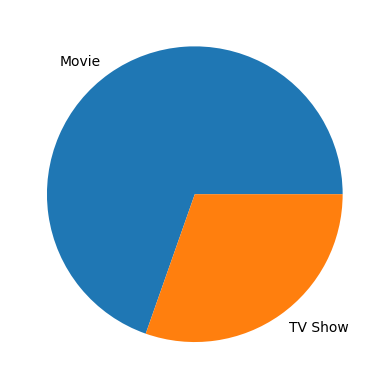

In [50]:
plt.pie(df["type"].value_counts(),labels=df["type"].value_counts().index)

### 2. Duration of Content

In [51]:
df["duration"].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [52]:
# we see that the duration is given in two seperate units 
# 1. season
# 2. min

In [53]:
null_percent("duration")

Percentage of null values in duration 0.034063812876121265


In [54]:
df.dropna(subset="duration",inplace=True)

In [55]:
null_percent("duration")

Percentage of null values in duration 0.0


In [56]:
from typing import Dict
def sort_dict_by_int_keys(dictionary:Dict,res_type):
    keys = [int(item) for item in dictionary.keys()]
    keys.sort()
    sorted_dictionary = {res_type(i): dictionary[str(i)] for i in keys }
    return sorted_dictionary

In [57]:
season_count = Counter([i[0] for i in df[df["duration"].str.contains("Season")]["duration"].str.split(" ").values])
sorted_seasons = sort_dict_by_int_keys(season_count,str)



[Text(0, 0, '1793'),
 Text(0, 0, '425'),
 Text(0, 0, '199'),
 Text(0, 0, '95'),
 Text(0, 0, '65'),
 Text(0, 0, '33'),
 Text(0, 0, '23'),
 Text(0, 0, '17'),
 Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

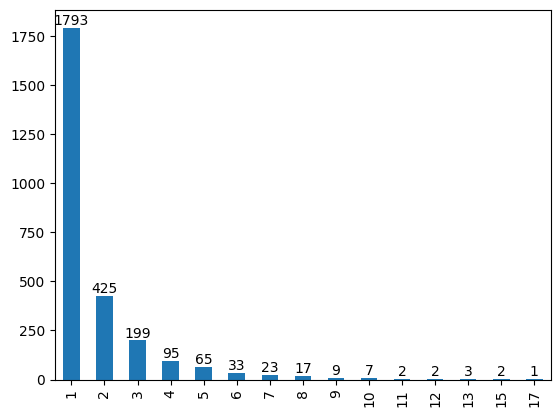

In [58]:
seasons_series = pd.Series(sorted_seasons)
fig = seasons_series.plot(kind="bar")
fig.bar_label(fig.containers[0], label_type="edge")
# plot in bar graph

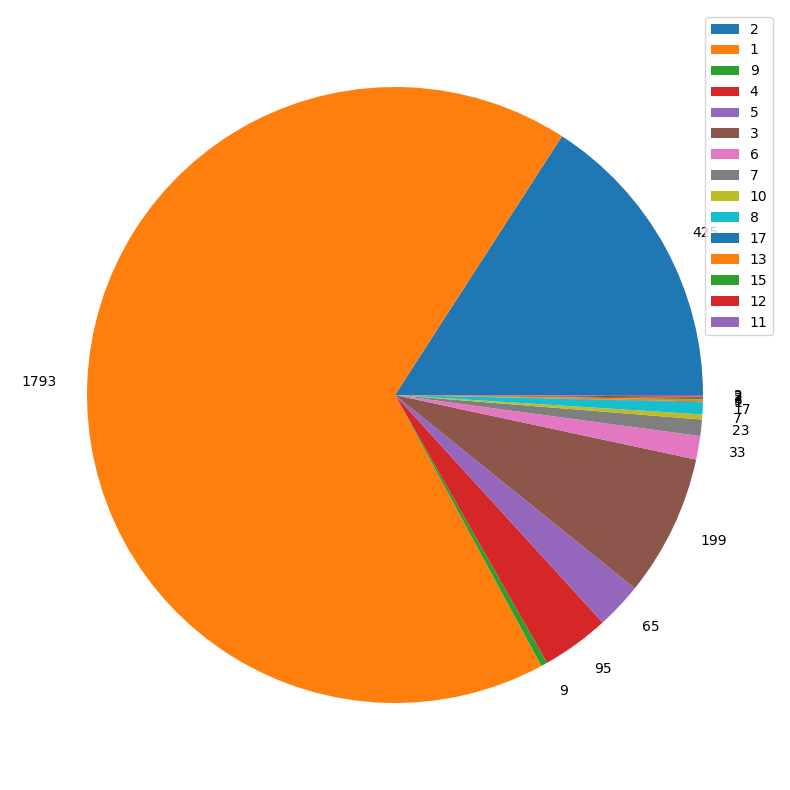

In [59]:
plt.figure(figsize=(10,10))
plt.pie(season_count.values(),labels=season_count.values())
plt.legend(season_count.keys())

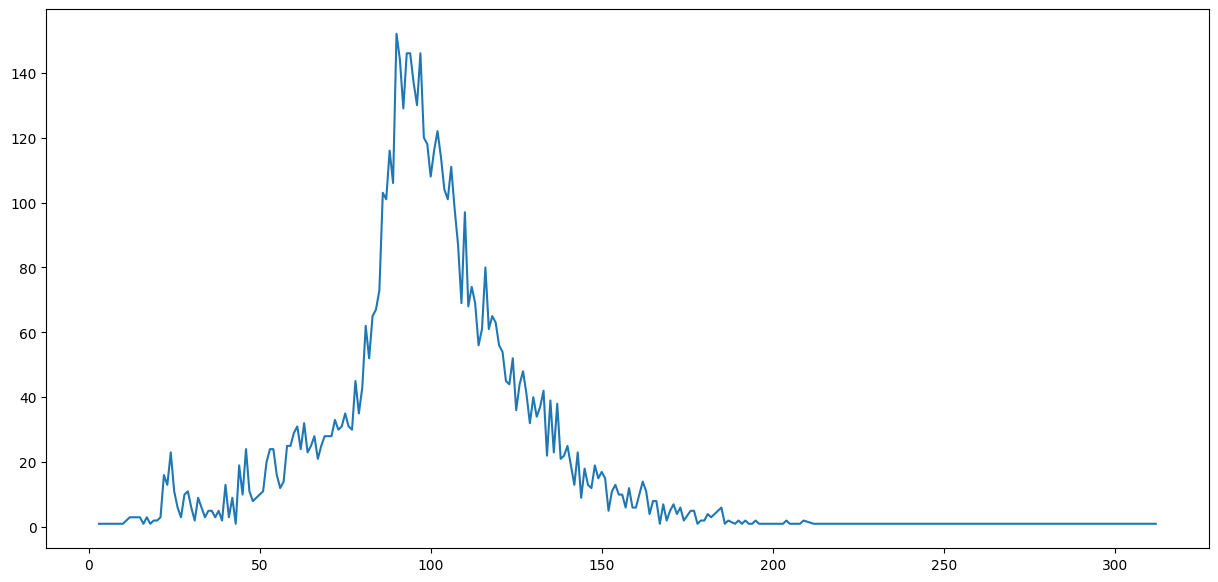

In [60]:
# now lets analyze shows whose duration is given in min
minutes_counter = Counter([i[0] for i in df[df["duration"].str.contains("min")]["duration"].str.split(" ").values])

minutes_sorted = sort_dict_by_int_keys(minutes_counter,int)
plt.figure(figsize=(15,7))
plt.plot(minutes_sorted.keys(), minutes_sorted.values())
# minutes_sorted

### 3. Rating of content

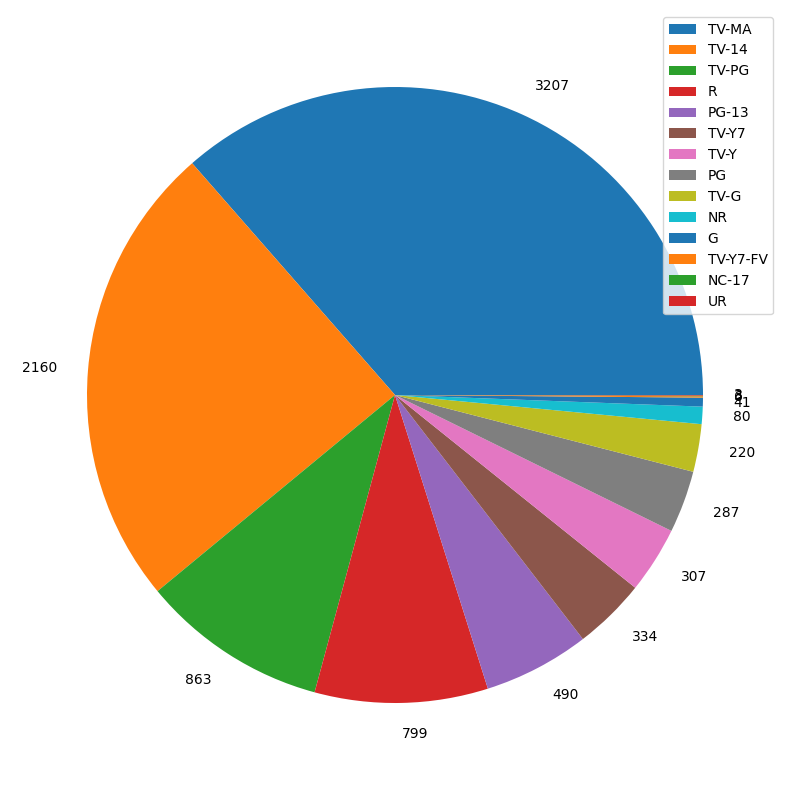

In [61]:
plt.figure(figsize=(10,10))
plt.pie(df["rating"].value_counts(), labels=df["rating"].value_counts().values)
plt.legend(df["rating"].value_counts().index)

### 4. Where is the content listed 


30 Most common listed in [('International Movies', 2752), ('Dramas', 2427), ('Comedies', 1674), ('International TV Shows', 1351), ('Documentaries', 869), ('Action & Adventure', 859), ('TV Dramas', 763), ('Independent Movies', 756), ('Children & Family Movies', 641), ('Romantic Movies', 616), ('TV Comedies', 581), ('Thrillers', 577), ('Crime TV Shows', 470), ("Kids' TV", 451), ('Docuseries', 395), ('Music & Musicals', 375), ('Romantic TV Shows', 370), ('Horror Movies', 357), ('Stand-Up Comedy', 343), ('Reality TV', 255), ('British TV Shows', 253), ('Sci-Fi & Fantasy', 243), ('Sports Movies', 219), ('Anime Series', 176), ('Spanish-Language TV Shows', 174), ('TV Action & Adventure', 168), ('Korean TV Shows', 151), ('Classic Movies', 116), ('LGBTQ Movies', 102), ('TV Mysteries', 98)]
Total no of unique listed in 42
Average listed in appearance 460.0
Median listed in appearance 248.0
Number of listed in appeared in more than 1 Netflix content: 42


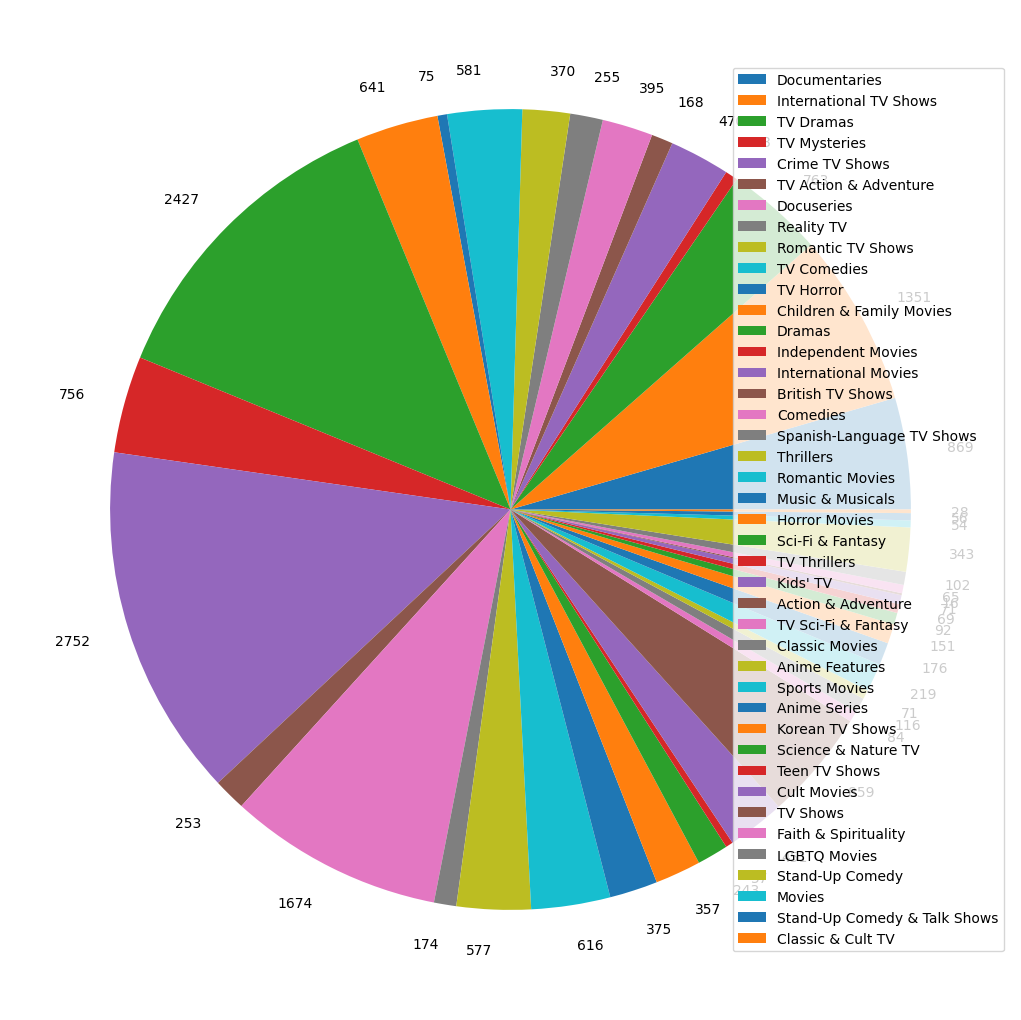

In [62]:
listed_freq = gen_freq_counter(df,"listed_in")
appearance_stats(listed_freq,"listed in")
plt.figure(figsize=(13,13))
plt.pie(listed_freq.values(), labels=listed_freq.values())
plt.legend(listed_freq.keys(),loc="right")

<BarContainer object of 42 artists>

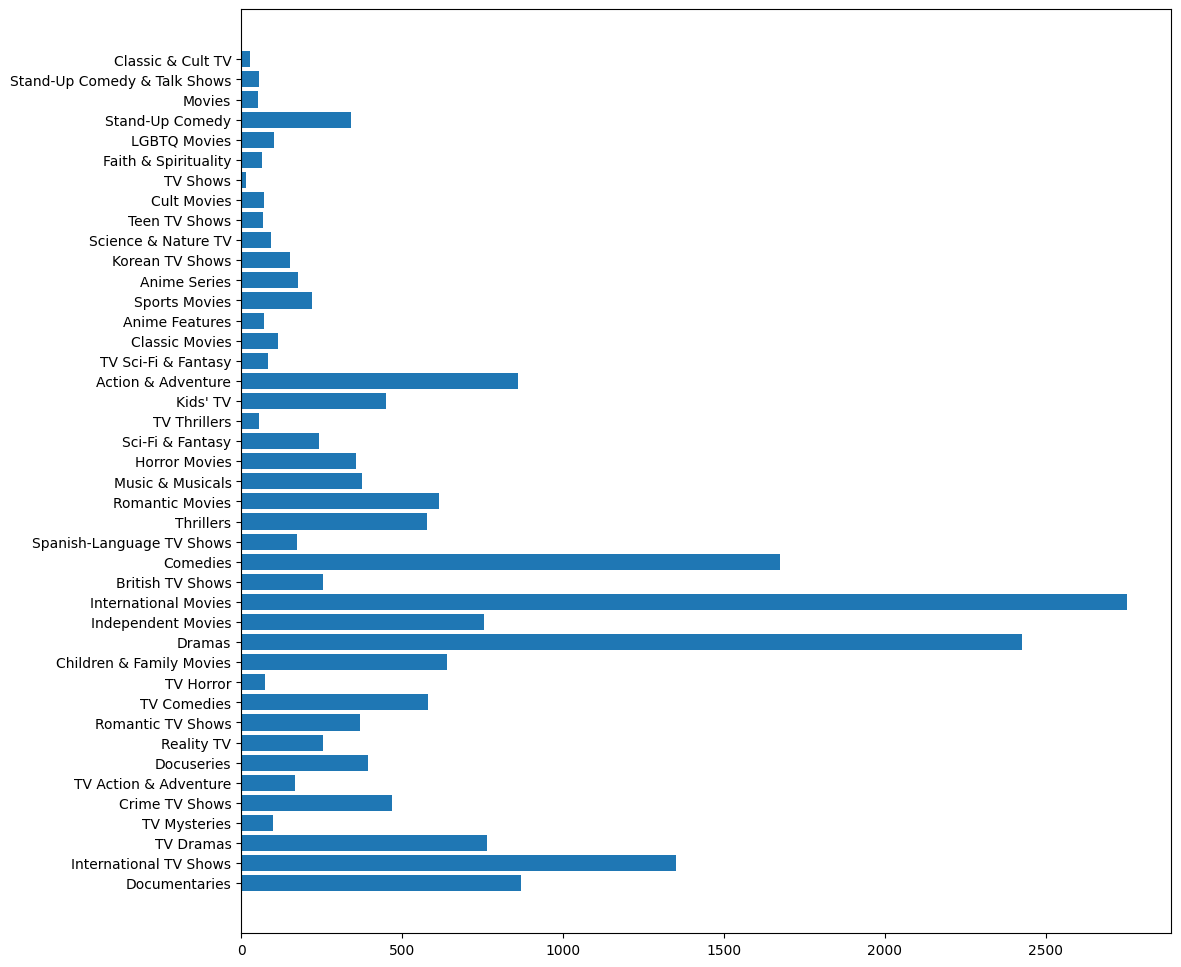

In [63]:
plt.figure(figsize=(12,12))
plt.barh(list(listed_freq.keys()),width=listed_freq.values())

### 5. Location of Production

In [64]:
production_location = px.bar(country_frequency_df, 
       x='country', y='frequency',
       title="Netflix Content Production Location Distribution")
production_location.show()

production_location_top20 = px.bar(country_frequency_df.head(20), 
       x='country', y='frequency',
       text="frequency",
       title="Top 20 Netflix Content Production Location Distribution")
production_location_top20.show()

px.bar(country_frequency_df.head(20), 
       x='country', y='percentage',
       text="percentage",
       title="Top 20 Netflix Content Production Location Percentage Distribution")

In [65]:
geo_mapping_url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"

country_geoinfo = pd.read_csv(geo_mapping_url)
country_geoinfo = country_geoinfo.rename({'name': 'country'}, axis='columns')
country_geoinfo = country_geoinfo[["country", "alpha-3", "region", "sub-region"]]
country_geoinfo.head()

,country,alpha-3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [66]:
production_location_df = pd.merge(country_frequency_df, 
                                  country_geoinfo[country_geoinfo.country.isin(country_names)], 
                                  how='left', on=["country"])
production_location_df.head()

,country,frequency,percentage,alpha-3,region,sub-region
0,United States,3689,36.838,NaN,NaN,NaN
1,India,1046,10.445,IND,Asia,Southern Asia
2,United Kingdom,804,8.029,NaN,NaN,NaN
3,Canada,445,4.444,CAN,Americas,Northern America
4,France,393,3.925,FRA,Europe,Western Europe


In [67]:
fig = px.choropleth(production_location_df, locations="alpha-3",
                    color="frequency",
                    hover_name="country",
                    title="Production Location Frequency of the Netflix Contents",
                    color_continuous_scale=px.colors.sequential.Bluyl)
fig.show()

In [68]:
fig = px.choropleth(production_location_df.query("region == 'Asia'"), locations="alpha-3",
                    color="frequency",
                    hover_name="country",
                    scope="asia",
                    title="Asia: Production Location Frequency of the Netflix Contents",
                    color_continuous_scale=px.colors.sequential.Bluyl)
fig.show()

In [69]:
# top 10 content production locations in Asia
production_location_df.query("region == 'Asia'").sort_values("frequency", ascending=False)[:10]

,country,frequency,percentage,alpha-3,region,sub-region
1,India,1046,10.445,IND,Asia,Southern Asia
5,Japan,318,3.176,JPN,Asia,Eastern Asia
10,China,162,1.618,CHN,Asia,Eastern Asia
13,Turkey,113,1.128,TUR,Asia,Western Asia
14,Hong Kong,105,1.049,HKG,Asia,Eastern Asia
19,Indonesia,90,0.899,IDN,Asia,South-eastern Asia
22,Philippines,83,0.829,PHL,Asia,South-eastern Asia
23,Thailand,70,0.699,THA,Asia,South-eastern Asia
30,Singapore,41,0.409,SGP,Asia,South-eastern Asia
32,United Arab Emirates,37,0.369,ARE,Asia,Western Asia


In [70]:
fig = px.choropleth(production_location_df.query("region == 'Europe'"), locations="alpha-3",
                    color="frequency",
                    hover_name="country",
                    scope="europe",
                    title="Europe: Production Location Frequency of the Netflix Contents",
                    color_continuous_scale=px.colors.sequential.Bluyl)
fig.show()

In [71]:
# top 10 content production locations in Europe
production_location_df.query("region == 'Europe'").sort_values("frequency", ascending=False)[:10]

,country,frequency,percentage,alpha-3,region,sub-region
4,France,393,3.925,FRA,Europe,Western Europe
6,Spain,232,2.317,ESP,Europe,Southern Europe
8,Germany,226,2.257,DEU,Europe,Western Europe
16,Italy,100,0.999,ITA,Europe,Southern Europe
20,Belgium,90,0.899,BEL,Europe,Western Europe
26,Netherlands,50,0.499,NLD,Europe,Western Europe
27,Denmark,48,0.479,DNK,Europe,Northern Europe
28,Ireland,46,0.459,IRL,Europe,Northern Europe
29,Sweden,42,0.419,SWE,Europe,Northern Europe
31,Poland,40,0.399,POL,Europe,Eastern Europe


In [72]:
fig = px.choropleth(production_location_df.query("region == 'Africa'"), locations="alpha-3",
                    color="frequency",
                    hover_name="country",
                    scope="africa",
                    title="Africa: Production Location Frequency of the Netflix Contents",
                    color_continuous_scale=px.colors.sequential.Bluyl)
fig.show()

In [73]:
# top 10 content production locations in Africa
production_location_df.query("region == 'Africa'").sort_values("frequency", ascending=False)[:10]

,country,frequency,percentage,alpha-3,region,sub-region
12,Egypt,117,1.168,EGY,Africa,Northern Africa
15,Nigeria,103,1.029,NGA,Africa,Sub-Saharan Africa
24,South Africa,62,0.619,ZAF,Africa,Sub-Saharan Africa
60,Morocco,6,0.060,MAR,Africa,Northern Africa
61,Kenya,6,0.060,KEN,Africa,Sub-Saharan Africa
63,Ghana,5,0.050,GHA,Africa,Sub-Saharan Africa
69,Zimbabwe,3,0.030,ZWE,Africa,Sub-Saharan Africa
74,Senegal,3,0.030,SEN,Africa,Sub-Saharan Africa
76,Algeria,3,0.030,DZA,Africa,Northern Africa
80,Mauritius,2,0.020,MUS,Africa,Sub-Saharan Africa


In [74]:
# group by location data by region
location_by_region = production_location_df.groupby("region", as_index=False).sum().sort_values("frequency", ascending=False)
px.bar(location_by_region.head(20), 
       x='region', y='frequency',
       text="frequency",
       title="Production location distribution by region")

/tmp/ipykernel_22310/2492176172.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### 6. Release year and date the content was added to netflix

In [75]:
null_percent("date_added")
null_percent(col="release_year")

Percentage of null values in date_added 0.11358473421172195
Percentage of null values in release_year 0.0


In [76]:
# as the null percentage is very small for date_added, we are dropping those rows with null
df.dropna(subset="date_added",inplace=True)
null_percent(col="date_added")

Percentage of null values in date_added 0.0


In [77]:
df["release_year"].value_counts()

2018    1146
2017    1031
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

<BarContainer object of 74 artists>

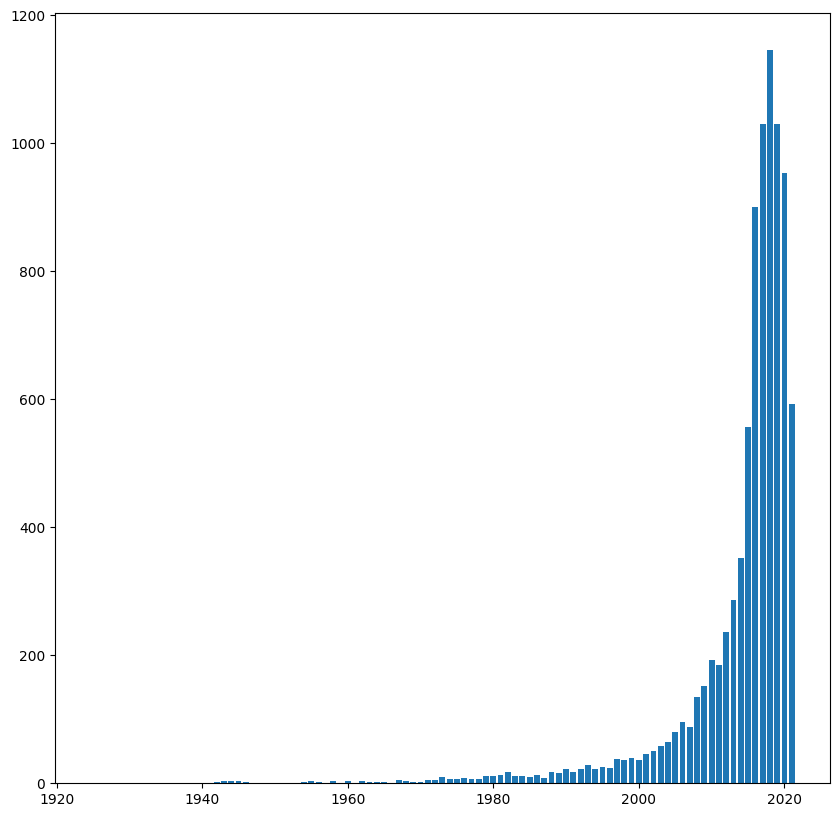

In [78]:
plt.figure(figsize=(10,10))
plt.bar(df["release_year"].value_counts().index, height=df["release_year"].value_counts().values)

<BarContainer object of 14 artists>

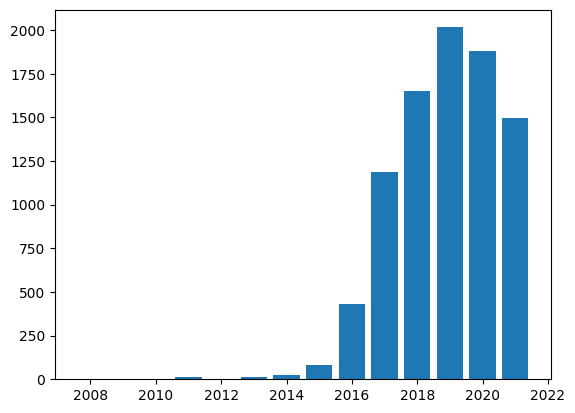

In [79]:
year_added_freq_sorted = sort_dict_by_int_keys(year_added_freq,int)
plt.bar(x=year_added_freq_sorted.keys(),height=year_added_freq_sorted.values())

In [80]:
df["year_added"] = df["date_added"].str.split(", ",expand=True)[1]
df.head(1) # observe the new col year added

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021


In [81]:
df["year_added"].isnull().sum()

0

In [82]:
df["year_added"] = df["year_added"].astype(int)

In [83]:
df["year_added"].dtype

dtype('int64')

In [84]:
release_year_dist = px.histogram(df,x="release_year", color="type",title="Release years")
release_year_dist.show()

Observation: Most of the content is released from 2000 to 2020. We observe a steep increase in the no of content released from 2000 to 2018, and then a fall. That fall may be due to bias in the dataset, as its expected that more content would be released in recent dates due to advances in technology.

In [85]:
year_added_dist = px.histogram(df, x= "year_added", color="type", title="Year added to netflix")
year_added_dist.show()

Observation: Most of the content are added from 2016 to 2021

In [86]:
new_df = df[["year_added", "release_year"]]
new_df

,year_added,release_year
0,2021,2020
1,2021,2021
2,2021,2021
3,2021,2021
4,2021,2021
...,...,...
8802,2019,2007
8803,2019,2018
8804,2019,2009
8805,2020,2006


In [87]:
gby_yadded = new_df.groupby("year_added",as_index=False)

In [88]:
gby_yadded.agg(lambda x: x.value_counts().index[0])

,year_added,release_year
0,2008,2006
1,2009,2009
2,2010,1987
3,2011,1988
4,2012,2011
5,2013,2013
6,2014,2014
7,2015,2015
8,2016,2016
9,2017,2017


Observation: From this we can see that each year netflix added content that was produced that year. 
In the first year avalaible in the dataset, ie in 2008, netflix added lot of content that was released in 2006.
And in 2010 and 2011 netflix added lot of content of 1987 and 1988 respectively.

In [89]:
release_yr_variety = gby_yadded.agg(lambda x: len(x.unique()))
release_yr_variety.columns = ["year_added", "total_unique_release_year"]
release_yr_variety.sort_values("total_unique_release_year", ascending=False)

,year_added,total_unique_release_year
11,2019,58
12,2020,56
9,2017,54
13,2021,52
10,2018,47
8,2016,33
7,2015,10
3,2011,8
6,2014,6
5,2013,5


In [90]:
df[df["year_added"] == 2019]["release_year"].unique()

array([2019, 2018, 2016, 2013, 2017, 2012, 2014, 2015, 2001, 2006, 2011,
       2007, 2010, 2004, 2009, 2008, 2005, 2020, 2003, 2002, 2000, 1998,
       1995, 1997, 1999, 1975, 1989, 1974, 1977, 1994, 1972, 1982, 1996,
       1992, 1973, 1960, 1976, 1958, 1988, 1965, 1990, 1956, 1979, 1978,
       1987, 1981, 1984, 1980, 1962, 1983, 1985, 1993, 1968, 1955, 1964,
       1986, 1970, 1967])

We can see that in the year 2019 content released ranging from 1967 to 2019 was added to netflix.

<Axes: >

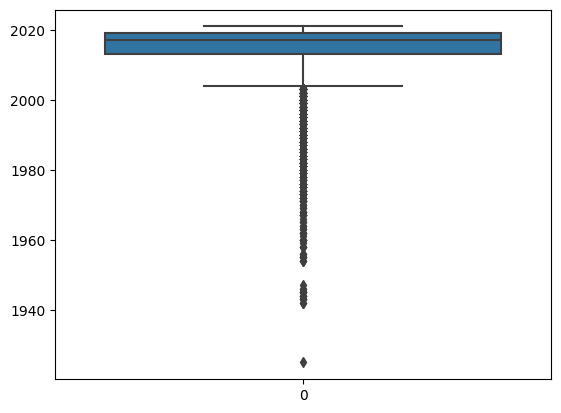

In [91]:
sns.boxplot(df["release_year"])

<Axes: >

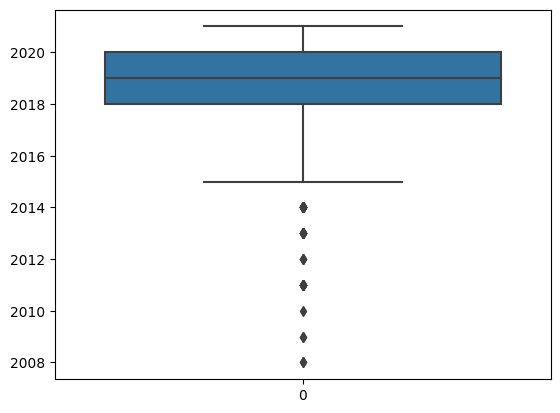

In [92]:
sns.boxplot(df["year_added"])

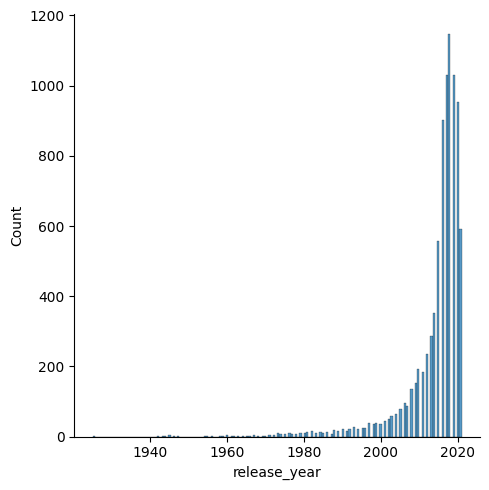

In [93]:
sns.displot(df["release_year"])

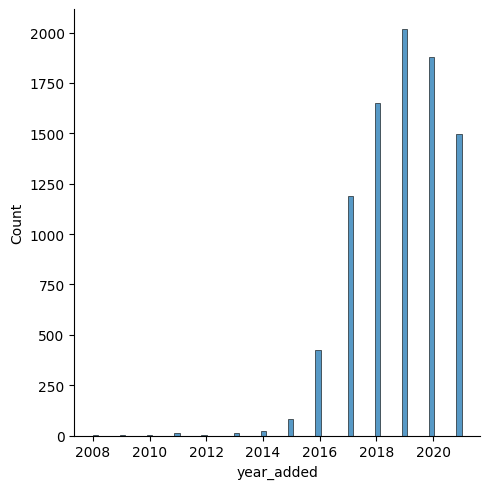

In [94]:
sns.displot(df["year_added"])

<Axes: xlabel='year_added', ylabel='release_year'>

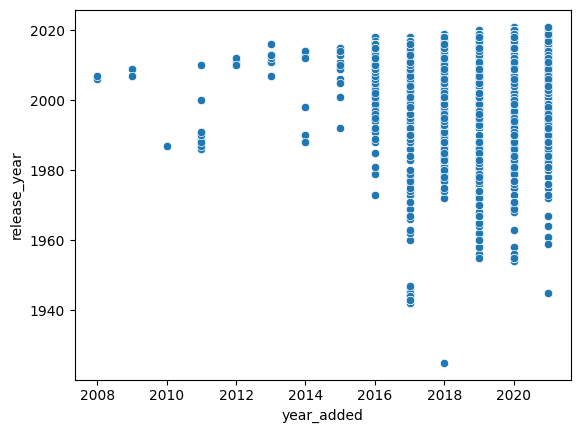

In [95]:
sns.scatterplot(x="year_added", y="release_year",data=df)

### 7. Misc Analysis

<Axes: xlabel='year_added', ylabel='rating'>

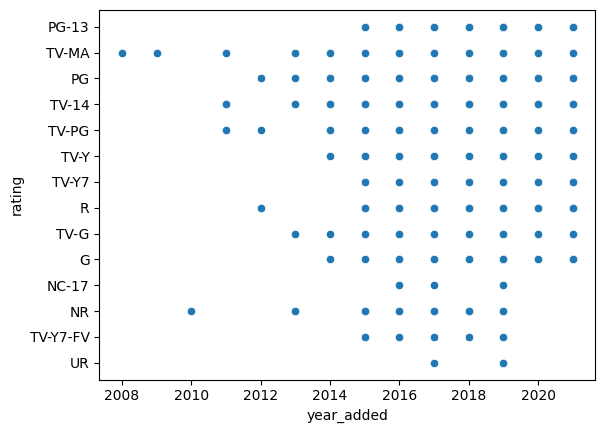

In [96]:
sns.scatterplot(x="year_added", y="rating",data=df)
# what type of content was added in different years

In [97]:
listed_freq

Counter({'Documentaries': 869,
         'International TV Shows': 1351,
         'TV Dramas': 763,
         'TV Mysteries': 98,
         'Crime TV Shows': 470,
         'TV Action & Adventure': 168,
         'Docuseries': 395,
         'Reality TV': 255,
         'Romantic TV Shows': 370,
         'TV Comedies': 581,
         'TV Horror': 75,
         'Children & Family Movies': 641,
         'Dramas': 2427,
         'Independent Movies': 756,
         'International Movies': 2752,
         'British TV Shows': 253,
         'Comedies': 1674,
         'Spanish-Language TV Shows': 174,
         'Thrillers': 577,
         'Romantic Movies': 616,
         'Music & Musicals': 375,
         'Horror Movies': 357,
         'Sci-Fi & Fantasy': 243,
         'TV Thrillers': 57,
         "Kids' TV": 451,
         'Action & Adventure': 859,
         'TV Sci-Fi & Fantasy': 84,
         'Classic Movies': 116,
         'Anime Features': 71,
         'Sports Movies': 219,
         'Anime Series': 176,

In [98]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


In [99]:
# i want to know the number of different types of movies produced in each year
# def agg_func(item):
#     print(item)
#     # print(item["listed_in"])
#     print(type(item))
#     print(len(item.unique()))
#     print("\n\n")
#     return item.unique()
# rel_group = df[["release_year","listed_in"]].groupby("release_year",as_index=False).agg(agg_func)
# work in progress

In [100]:
percentage(df[df["type"] == "Movie"]),percentage(df[df["type"] == "TV Show"])

(' (70 %) ', ' (30 %) ')

### Business insights 
Following are some insights based on my EDA
- most content is produced in USA(37%) and India(10%), followed by UK(8%), Canada(4%) and France(4%).
- the no of shows added each year started getting high from 2014 and maximum no of shows were added in 2019 followed by 2020 and 2018.
- International Movies and Dramas are the most popular genre on netflix.
- Most movies are rated TV-MA (mature audience) followed by TV-14 and TV-PG
- Most web series are having one season. The no of series having more than one season steeply falls
- The no of minutes in a show roughly fits into a normal distribution, with most of the shows having around 100 minutes of show time
- Movies constitute 70% of the shows while remaining are TV shows
- Indian Actors have more no of appearances in content, with Anupam Kher and Shah Rukh Khan having the highest no of appearances.


### Recommendations

- Produce more films in India with Indian cast
